In [33]:
import numpy as np
from matplotlib import pyplot as plt

In [34]:
train_all = np.loadtxt('largeTrain.csv', dtype=int, delimiter=',')
valid_all = np.loadtxt('largeValidation.csv', dtype=int, delimiter=',')

# print(train_all.shape)
# print(valid_all.shape)

X_train = train_all[:, 1:]
y_train = train_all[:, 0]
y_train = y_train.reshape(y_train.shape[0],1)
# y_train = y_train.T
X_val = valid_all[:, 1:]
X_val = X_val.T 
y_val = valid_all[:, 0]
y_val = y_val.reshape(y_val.shape[0],1)
feature_set=X_train

In [35]:
instances = feature_set.shape[0]
attributes = feature_set.shape[1]
hidden_nodes = 20
output_labels = 10
instances

9000

In [36]:
one_hot_labels = np.zeros((9000, 10))
for i in range(one_hot_labels.shape[0]):
        one_hot_labels[i,y_train[i,0]]=1

In [49]:
wh = np.random.rand(attributes,hidden_nodes)
bh = np.random.randn(hidden_nodes)

wo = np.random.rand(hidden_nodes,output_labels)
bo = np.random.randn(output_labels)
lr = .0001

In [50]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)


In [51]:
error_cost = []

for epoch in range(100):
############# feedforward

    # Phase 1
    zh = np.dot(feature_set, wh) + bh
    ah = sigmoid(zh)

    # Phase 2
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)

########## Back Propagation

########## Phase 1

    dcost_dzo = ao - one_hot_labels
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_bo = dcost_dzo

########## Phases 2

    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh

    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 2 == 0:
        loss = (1/instances)*np.sum(-one_hot_labels * np.log(ao))
        print('Loss function value: ', loss)
        error_cost.append(loss)

Loss function value:  3.109601189954064
Loss function value:  2.374016397285812
Loss function value:  2.31979035148137
Loss function value:  2.311261582012293
Loss function value:  2.307124875807433
Loss function value:  2.3048514948763845
Loss function value:  2.3035262060305364
Loss function value:  2.3027267877764124
Loss function value:  2.3022329065511022
Loss function value:  2.3019212356355103
Loss function value:  2.3017198422302374
Loss function value:  2.3015857320891544
Loss function value:  2.3014928320881487
Loss function value:  2.301425193941826
Loss function value:  2.301373012141683
Loss function value:  2.3013302387364964
Loss function value:  2.3012931353036
Loss function value:  2.3012593868174256
Loss function value:  2.3012275568321563
Loss function value:  2.301196751609119
Loss function value:  2.3011664127369595
Loss function value:  2.3011361889745277
Loss function value:  2.3011058570094627
Loss function value:  2.3010752724434416
Loss function value:  2.3010

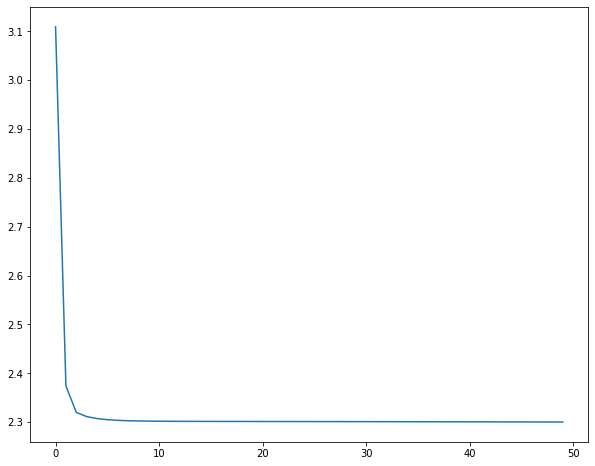

In [52]:
plt.figure(figsize=(10, 8))
plt.plot(error_cost)
plt.show()

In [53]:
ao

array([[0.0998276 , 0.10033186, 0.10005124, ..., 0.10015063, 0.10023998,
        0.09997952],
       [0.09982727, 0.10033203, 0.10005146, ..., 0.10015071, 0.10024005,
        0.09997941],
       [0.0998304 , 0.10032771, 0.10005184, ..., 0.10014847, 0.10023977,
        0.09997989],
       ...,
       [0.09982745, 0.10033197, 0.10005152, ..., 0.10015085, 0.10023986,
        0.09997944],
       [0.09982725, 0.10033204, 0.10005147, ..., 0.10015072, 0.10024005,
        0.09997941],
       [0.09988811, 0.10027407, 0.10001489, ..., 0.10011336, 0.10024033,
        0.09999187]])